In [63]:
#print 함수 없이 출력
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'

#주피터 화면 확장
# from IPython.display import display, HTML
# display(HTML("<style>.container {width:90% !important;}</style>"))

#마지막 함수만 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='last_expr'


In [64]:
import pandas as pd

longley = pd.read_csv("/home/hshziwo/공부/vscode/다변량분석/longley.csv")
#도시명은 자료에서 제외함. 
longley = longley.drop(longley.columns[[0]], axis=1)
print(longley.shape)
longley.head(3)

(16, 7)


,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171


In [65]:
longley.tail(3)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
13,114.2,502.601,393.1,251.4,125.368,1960,69.564
14,115.7,518.173,480.6,257.2,127.852,1961,69.331
15,116.9,554.894,400.7,282.7,130.081,1962,70.551


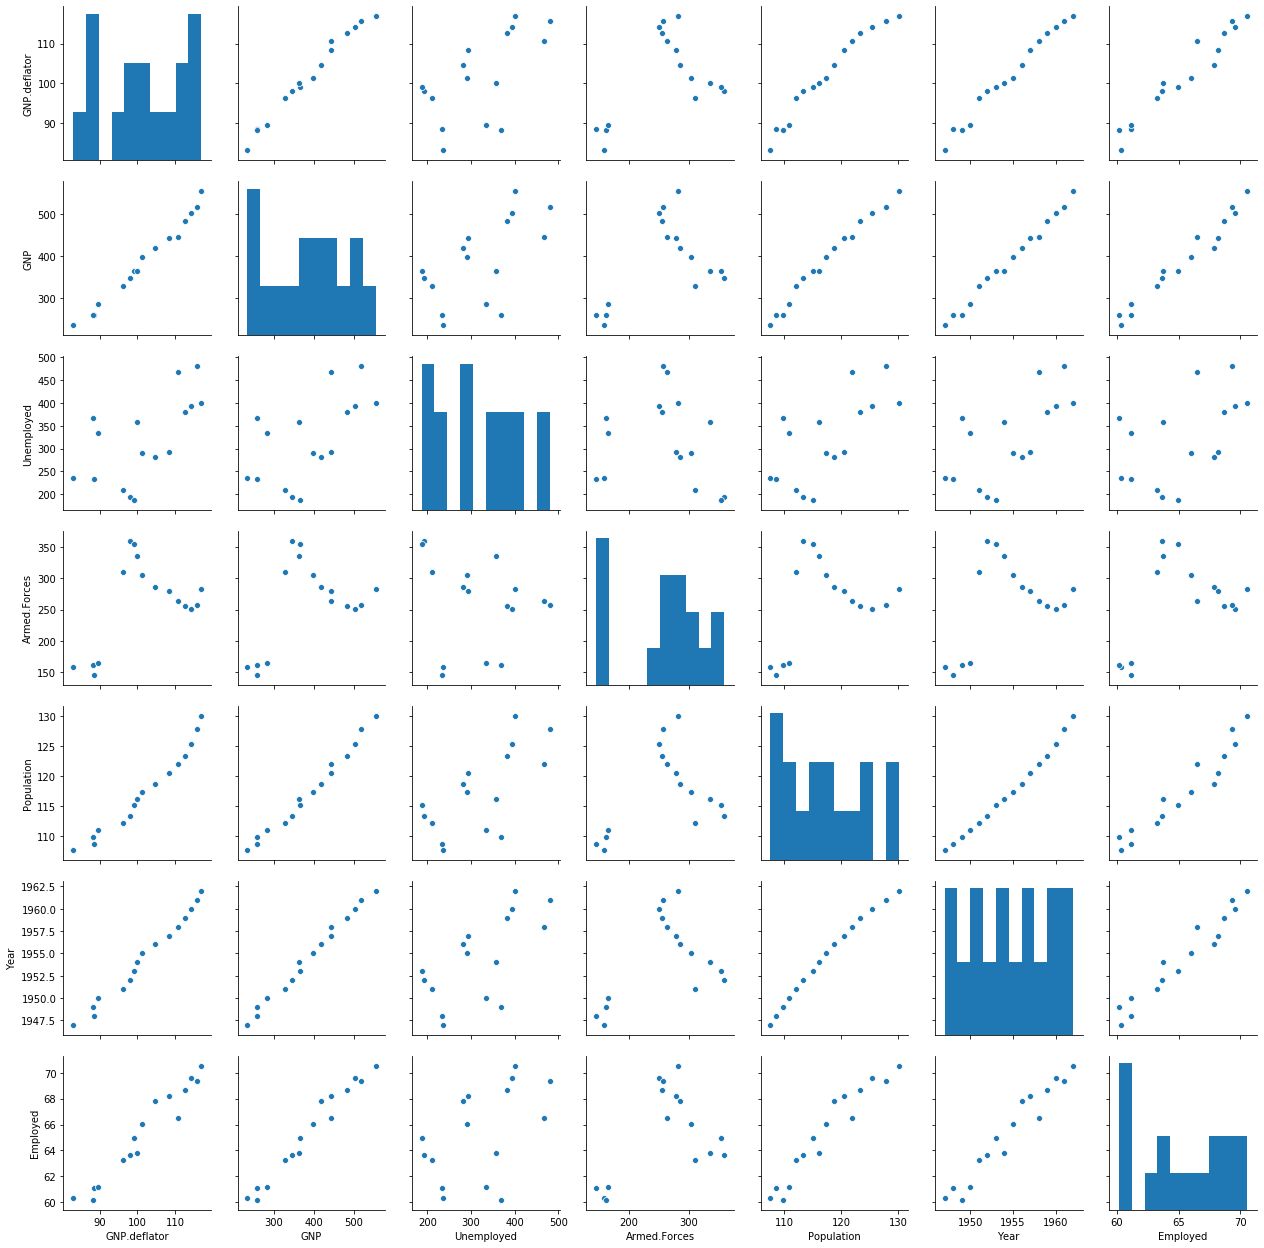

In [66]:
import seaborn as sns
sns.pairplot(longley)

In [67]:
round(longley.corr(), 3)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
GNP.deflator,1.000,0.992,0.621,0.465,0.979,0.991,0.971
GNP,0.992,1.000,0.604,0.446,0.991,0.995,0.984
Unemployed,0.621,0.604,1.000,-0.177,0.687,0.668,0.502
Armed.Forces,0.465,0.446,-0.177,1.000,0.364,0.417,0.457
Population,0.979,0.991,0.687,0.364,1.000,0.994,0.960
Year,0.991,0.995,0.668,0.417,0.994,1.000,0.971
Employed,0.971,0.984,0.502,0.457,0.960,0.971,1.000


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 읽기
us_crime = pd.read_csv("/home/hshziwo/공부/vscode/다변량분석/ex2-4.csv")
#도시명은 자료에서 제외함. 
us_crime = us_crime.drop(us_crime.columns[[0]], axis=1)
us_crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [69]:
us_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [70]:
#초기 주성분분석
from sklearn.decomposition import PCA
pca_init = PCA(n_components=len(us_crime.columns))
pca_init.fit_transform(us_crime)
pca_init.explained_variance_

array([7.01111485e+03, 2.01992366e+02, 4.21126508e+01, 6.16424618e+00])

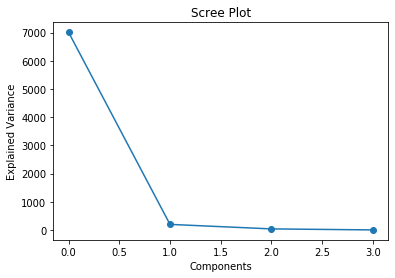

In [71]:
#스크리 그림 그리기
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.plot(pca_init.explained_variance_, 'o-')
plt.show()

In [72]:
#주성분분석 - 주성분 수 2으로 함
from sklearn.decomposition import PCA
pca_us_crime = PCA(n_components=2)
pca_us_crime.fit_transform(us_crime)

#주성분분산
pca_us_crime.explained_variance_

array([7011.11485102,  201.99236632])

In [73]:
#주성분 표준편차
np.sqrt(pca_us_crime.explained_variance_)

array([83.73240025, 14.21240185])

In [74]:
#주성분분산 비율
pca_us_crime.explained_variance_ratio_


array([0.96553422, 0.02781734])

In [75]:
#주성분계수
np.round(pca_us_crime.components_, 3)

array([[ 0.042,  0.995,  0.046,  0.075],
       [ 0.045,  0.059, -0.977, -0.201]])

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 읽기
mall_customer = pd.read_csv("/home/hshziwo/공부/vscode/다변량분석/mall_customer.csv")
male_mall_customer = mall_customer[mall_customer.Gender == 'Male']
female_mall_customer = mall_customer[mall_customer.Gender == 'Female'] 
#id, 성별은 자료에서 제외함. 
male_mall_customer = male_mall_customer.drop(male_mall_customer.columns[[0,1]], axis=1)
female_mall_customer = female_mall_customer.drop(female_mall_customer.columns[[0,1]], axis=1)

#표준화 시행
from sklearn.preprocessing import StandardScaler
zmale_mall_customer = StandardScaler().fit_transform(male_mall_customer)
zfemale_mall_customer = StandardScaler().fit_transform(female_mall_customer)

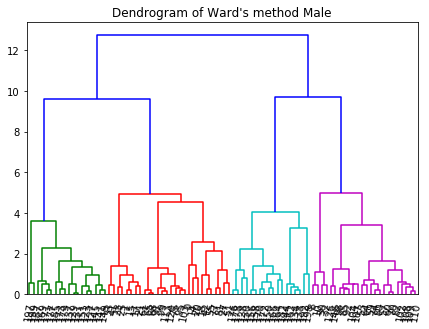

In [77]:
#와드의 방법
import scipy.cluster.hierarchy as sch
male_wlink = sch.linkage(zmale_mall_customer, 'ward')
plt.figure(figsize=(7,5))
sch.dendrogram(male_wlink,
               leaf_rotation=80,
               leaf_font_size=10,
               labels=male_mall_customer.index
               )
plt.title("Dendrogram of Ward's method Male")
plt.show()

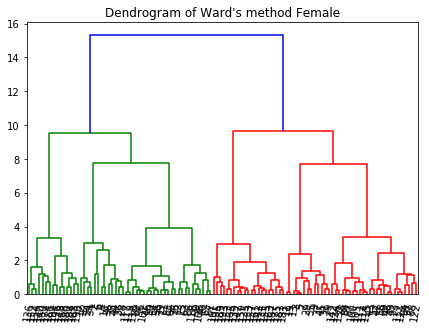

In [78]:
import scipy.cluster.hierarchy as sch
female_wlink = sch.linkage(zfemale_mall_customer, 'ward')
plt.figure(figsize=(7,5))
sch.dendrogram(female_wlink,
               leaf_rotation=80,
               leaf_font_size=10,
               labels=female_mall_customer.index
               )
plt.title("Dendrogram of Ward's method Female")
plt.show()

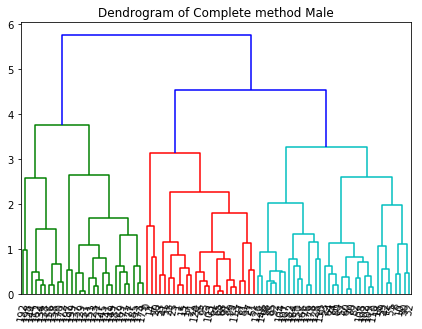

In [79]:
#최장연결법의 방법
import scipy.cluster.hierarchy as sch
male_clink = sch.linkage(zmale_mall_customer, 'complete')
plt.figure(figsize=(7,5))
sch.dendrogram(male_clink,
               leaf_rotation=80,
               leaf_font_size=10,
               labels=male_mall_customer.index
               )
plt.title("Dendrogram of Complete method Male")
plt.show()

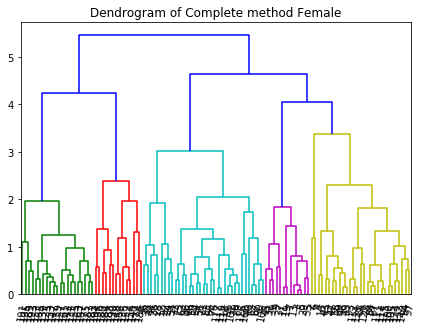

In [80]:
import scipy.cluster.hierarchy as sch
female_clink = sch.linkage(zfemale_mall_customer, 'complete')
plt.figure(figsize=(7,5))
sch.dendrogram(female_clink,
               leaf_rotation=80,
               leaf_font_size=10,
               labels=female_mall_customer.index
               )
plt.title("Dendrogram of Complete method Female")
plt.show()

In [81]:
#K-Means k=6
from sklearn.cluster import KMeans
zmale_kmc = KMeans(n_clusters= 6)
zmale_kmc.fit(zmale_mall_customer)
#군집 중심 알기
zmale_kmc.cluster_centers_

array([[-0.08641895,  0.89356415, -1.23660932],
       [-0.42323791,  0.93948832,  1.23136254],
       [ 0.79040969, -1.37247859, -1.12703061],
       [ 1.26362421, -0.26720215, -0.04367192],
       [-0.9498629 , -0.26124848,  0.16182373],
       [-0.99873015, -1.41684067,  0.91170263]])

In [82]:
from sklearn.cluster import KMeans
zfemale_kmc = KMeans(n_clusters= 6)
zfemale_kmc.fit(zfemale_mall_customer)
#군집 중심 알기
zfemale_kmc.cluster_centers_

array([[-1.00390496, -1.29588563,  1.20846472],
       [ 0.45183635,  1.31434524, -1.28645233],
       [ 1.27551966, -0.19382587, -0.1068539 ],
       [-0.46933289,  1.03483425,  1.25545945],
       [ 0.27330616, -1.26321   , -1.2843925 ],
       [-0.8054178 , -0.07298547, -0.18356213]])